In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_results

In [3]:
plt.rc('font', size=16)

# MP148-MP153

In [4]:
MP060 = get_results("MP060")
MP080 = get_results("MP080")
MP148 = get_results("MP148")
MP149 = get_results("MP149")
MP150 = get_results("MP150")
MP151 = get_results("MP151")
MP152 = get_results("MP152")
MP153 = get_results("MP153")

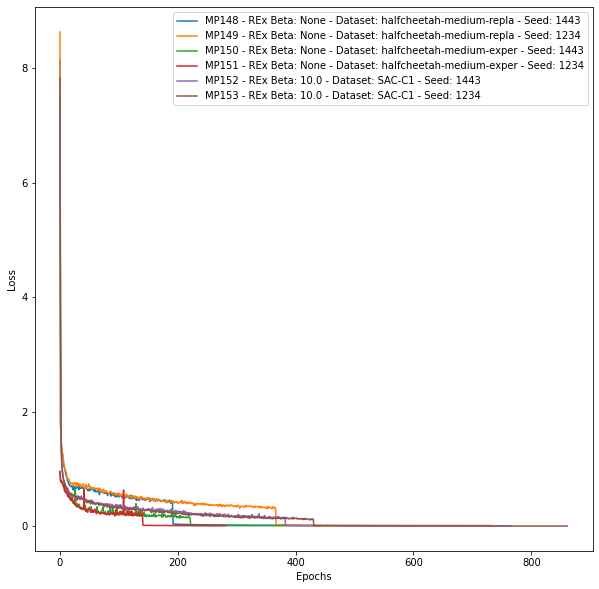

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for exp in [
    MP148,
    MP149,
    MP150,
    MP151,
    MP152,
    MP153,
]:
    ax.plot(exp.dynamics.model_loss_history.mean(axis=1), label=f'{exp.name} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
pass

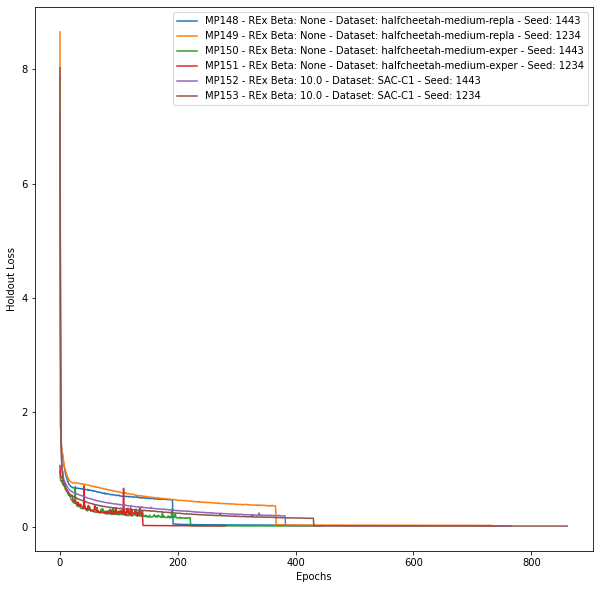

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for exp in [
    MP148,
    MP149,
    MP150,
    MP151,
    MP152,
    MP153,
]:
    ax.plot(exp.dynamics.model_holdout_loss_history.mean(axis=1), label=f'{exp.name} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
ax.set_xlabel('Epochs')
ax.set_ylabel('Holdout Loss')
ax.legend()
pass

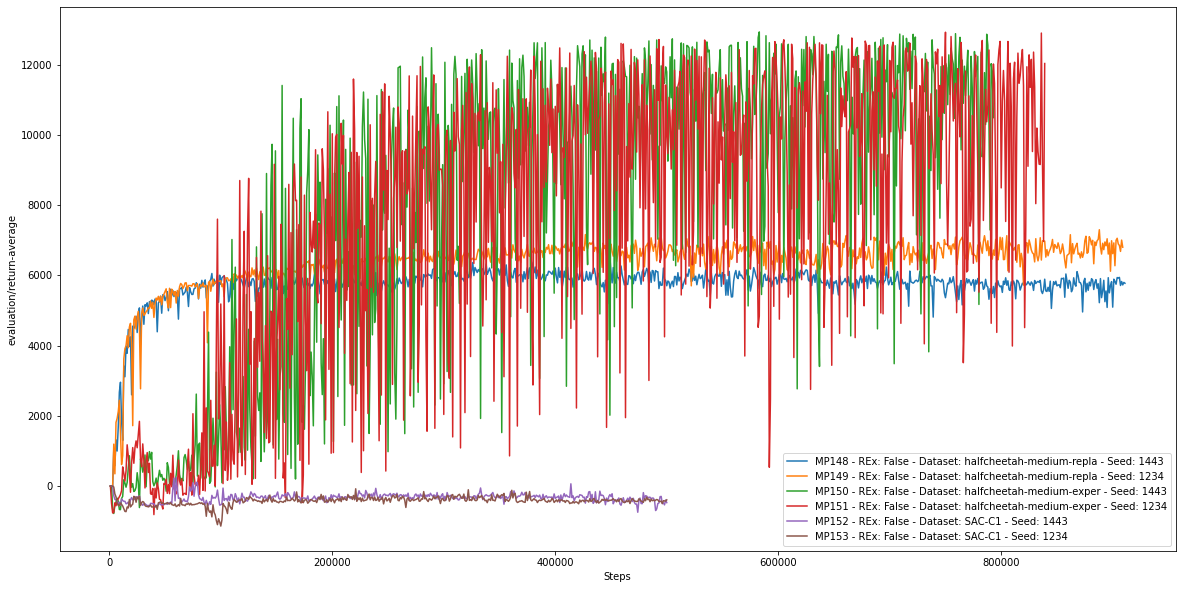

In [7]:
feature = 'evaluation/return-average'
fig, ax = plt.subplots(1, 1, figsize=(20,10))
for exp in [
    MP148,
    MP149,
    MP150,
    MP151,
    MP152,
    MP153,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - REx: {exp.rex} - Dataset: {exp.dataset} - Seed: {exp.seed}', ls='--' if exp.rex else '-'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

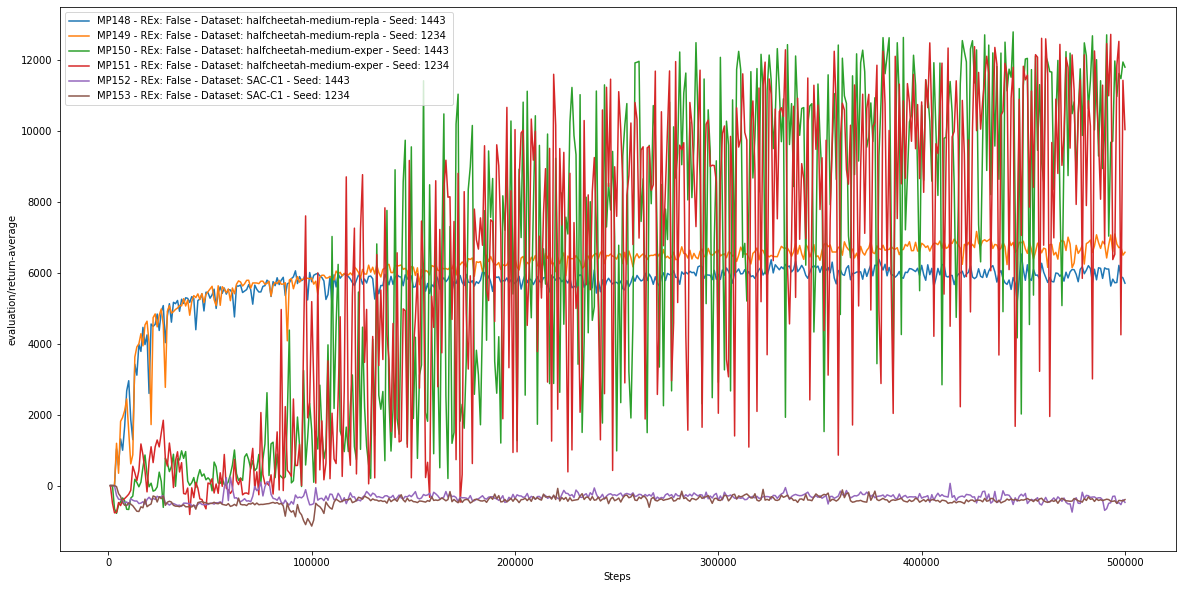

In [8]:
feature = 'evaluation/return-average'
fig, ax = plt.subplots(1, 1, figsize=(20,10))
for exp in [
    MP148,
    MP149,
    MP150,
    MP151,
    MP152,
    MP153,
]:
    ax.plot(
        exp.sac.result['timesteps_total'][:500], exp.sac.result[feature][:500], label=f'{exp.name} - REx: {exp.rex} - Dataset: {exp.dataset} - Seed: {exp.seed}', ls='--' if exp.rex else '-'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

In [9]:
MP080.sac.result[feature].shape

(501,)

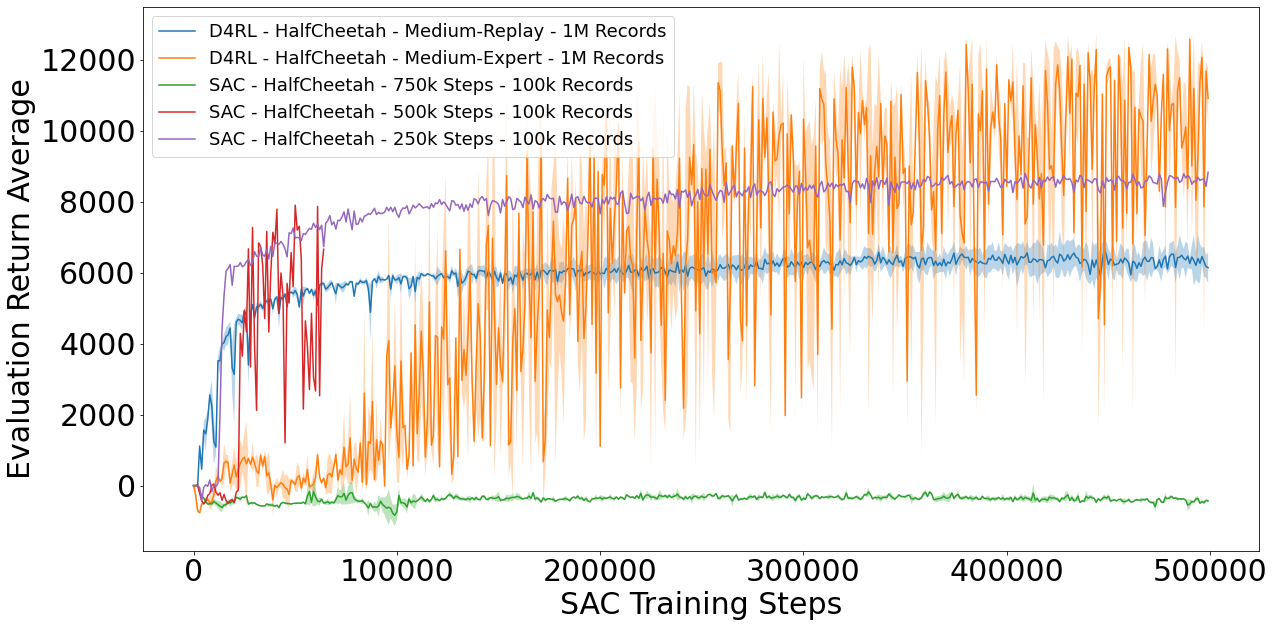

In [19]:
feature = 'evaluation/return-average'
fig, ax = plt.subplots(1, 1, figsize=(20,10))
plt.rc('font', size=30)

d4rl_med_replay = np.vstack((MP148.sac.result[feature][:500], MP149.sac.result[feature][:500]))
d4rl_med_expert = np.vstack((MP150.sac.result[feature][:500], MP151.sac.result[feature][:500]))
sac_c1          = np.vstack((MP152.sac.result[feature][:500], MP153.sac.result[feature][:500]))

ax.plot(np.arange(0, 500000, 1000), d4rl_med_replay.mean(axis=0), label='D4RL - HalfCheetah - Medium-Replay - 1M Records')
ax.fill_between(np.arange(0, 500000, 1000), d4rl_med_replay.min(axis=0), d4rl_med_replay.max(axis=0), alpha=0.3)

ax.plot(np.arange(0, 500000, 1000), d4rl_med_expert.mean(axis=0), label='D4RL - HalfCheetah - Medium-Expert - 1M Records')
ax.fill_between(np.arange(0, 500000, 1000), d4rl_med_expert.min(axis=0), d4rl_med_expert.max(axis=0), alpha=0.3)

ax.plot(np.arange(0, 500000, 1000), sac_c1.mean(axis=0), label='SAC - HalfCheetah - 750k Steps - 100k Records')
ax.fill_between(np.arange(0, 500000, 1000), sac_c1.min(axis=0), sac_c1.max(axis=0), alpha=0.3)

ax.plot(np.arange(0, 65000, 1000), MP060.sac.result[feature], label='SAC - HalfCheetah - 500k Steps - 100k Records')

ax.plot(np.arange(0, 500000, 1000), MP080.sac.result[feature][:500], label='SAC - HalfCheetah - 250k Steps - 100k Records')

ax.set_xlabel('SAC Training Steps')
ax.set_ylabel('Evaluation Return Average')
ax.legend(prop={'size': 18})
fig.savefig(os.path.join('dogo_plots', f'impact_of_experience.png'), pad_inches=0.2, bbox_inches='tight')
pass